In [1]:
# RAHMADI RIDWAN
# ridwan@blast.co.id

from google.colab import files
import zipfile

In [2]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-23 01:38:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.3’

rockpaperscissors.z 100%[===================>] 307.92M  3.08MB/s    in 2m 3s   

2021-07-23 01:40:48 (2.50 MB/s) - ‘rockpaperscissors.zip.3’ saved [322873683/322873683]



In [3]:
import os

zip_lokal = '/content/rockpaperscissors.zip'

refzip = zipfile.ZipFile(zip_lokal, 'r')
refzip.extractall('/tmp')
refzip.close()

dirbase = '/tmp/rockpaperscissors'
trndir = os.path.join(dirbase, 'rps-cv-images')

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

In [5]:
data_gen_train = ImageDataGenerator(rescale=1.0/255,rotation_range=20,horizontal_flip=True,shear_range = 0.2,fill_mode = 'nearest',validation_split=0.4)
data_gen_valid = ImageDataGenerator(rescale = 1.0/255,validation_split=0.4)
trgen = data_gen_train.flow_from_directory(trndir,target_size=(100,150),batch_size=32,class_mode='categorical',subset='training')
vgen = data_gen_valid.flow_from_directory(trndir,target_size=(100,150),batch_size=32,class_mode='categorical',subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [7]:
lr_red = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.000003)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
la_histoire = model.fit(trgen, epochs=15,validation_data=vgen,callbacks=[lr_red])

Epoch 1/15
42/42 [==============================] - 26s 592ms/step - loss: 1.0483 - accuracy: 0.4490 - val_loss: 0.9388 - val_accuracy: 0.7380
Epoch 2/15
42/42 [==============================] - 25s 583ms/step - loss: 0.7828 - accuracy: 0.6872 - val_loss: 0.6482 - val_accuracy: 0.8375
Epoch 3/15
42/42 [==============================] - 24s 580ms/step - loss: 0.5176 - accuracy: 0.8097 - val_loss: 0.3714 - val_accuracy: 0.9050
Epoch 4/15
42/42 [==============================] - 24s 578ms/step - loss: 0.3580 - accuracy: 0.8714 - val_loss: 0.2753 - val_accuracy: 0.9405
Epoch 5/15
42/42 [==============================] - 24s 576ms/step - loss: 0.3041 - accuracy: 0.8881 - val_loss: 0.2960 - val_accuracy: 0.9279
Epoch 6/15
42/42 [==============================] - 24s 577ms/step - loss: 0.2544 - accuracy: 0.9117 - val_loss: 0.2250 - val_accuracy: 0.9325

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/15
42/42 [==============================] - 25s 584ms

In [8]:
import numpy as np

In [9]:
def image_predictor(uploaded_image, model = model):
  img = uploaded_image
  img_arr = np.asarray(img)
  img_arr = img_arr/225
  img_in = tf.reshape(img_arr, shape = [1, 100, 150, 3])
  prob_pred = sorted(model.predict(img_in)[0])[2]
  class_pred = np.argmax(model.predict(img_in))
  if class_pred == 1:
      pl = 'Batu'
  elif class_pred == 0:
      pl = 'Kertas'
  else:
      pl = 'Gunting'
  plt.show()
  print("\n")
  print("Hasil prediksi gambar: ", pl)
  print("Probabilitas klasifikasi: ", prob_pred*100, "%")
  print('\n')

In [10]:
unggah = files.upload()

Saving Paper.JPG to Paper (1).JPG


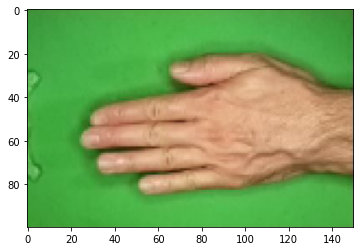



Hasil prediksi gambar:  Kertas
Probabilitas klasifikasi:  97.19526171684265 %




In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for f_n in unggah.keys():
  jalur = f_n
  gambar = image.load_img(jalur, target_size=(100,150))
  imgplot = plt.imshow(gambar)
  X = image.img_to_array(gambar)
  X = np.expand_dims(X, axis=0)
  gambar = np.vstack([X])

image_predictor(gambar)